In [1]:
from __future__ import print_function
from sklearn.datasets import load_iris
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading iris dataset from sklearn
iris = load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'] + 
                       ['species'])
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


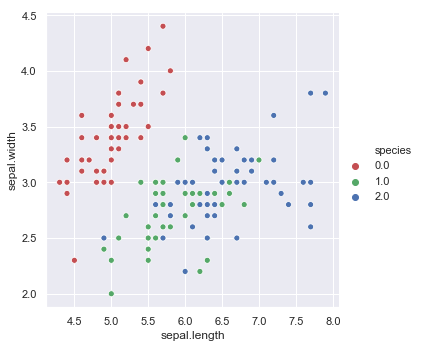

In [3]:
sns.set()
sns.relplot(x = "sepal.length", y = "sepal.width", data = iris_df, hue = "species", palette = ['r', 'g', 'b'])
plt.show()

We see that two of the classes above (1 and 2) are linearly inseparable and hence, we club them together for our task of classification. Logistic regression will then model the probability that each input belongs to one of these two categories created.

In [4]:
# combining two similar categories into one
X_df = iris_df.iloc[:, :4]
X_df = X_df.values
y_df = (iris_df.species != 0) * 1
y_df = y_df.values.reshape((y_df.shape[0], 1))

In [5]:
train_index = np.random.choice(len(X_df), round(len(X_df) * 0.8), replace=False)

test_index = np.array(list(set(range(len(X_df))) - set(train_index)))
train_X = X_df[train_index]
train_y = y_df[train_index]
test_X = X_df[test_index]
test_y = y_df[test_index]

In [6]:
# Parameters
learning_rate = 0.01
batch_size = 30
iter_num = 150

# tf Graph Input
x = tf.placeholder("float32", [None, X_df.shape[1]])
y = tf.placeholder("float32", [None, 1])

# Set model weights
W = tf.Variable(tf.zeros([X_df.shape[1], 1]))
b = tf.Variable(tf.zeros([1, 1]))

In [7]:
# Construct model
mod = tf.matmul(x, W) + b
pred = tf.round(tf.sigmoid(mod))

correct = tf.cast(tf.equal(pred, y), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

# Minimize error using cross entropy
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=y))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:
k = 0
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(iter_num):
        batch_index = np.random.choice(train_X.shape[0], size=batch_size)
        batch_train_X = train_X[batch_index]
        batch_train_y = train_y[batch_index]

        sess.run(optimizer, feed_dict={x: batch_train_X, y: batch_train_y})
        temp_loss = sess.run(cost, feed_dict={x: batch_train_X, y: batch_train_y})
        train_acc = sess.run(accuracy, feed_dict={x: train_X, y: train_y})
        test_acc = sess.run(accuracy, feed_dict={x: test_X, y: test_y})

        if (epoch + 1) % 10 == 0:
            print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss, 
                                                                                     train_acc, test_acc))

epoch:   10 loss: 0.472354 train_acc: 0.666667 test_acc: 0.666667
epoch:   20 loss: 0.454752 train_acc: 0.666667 test_acc: 0.666667
epoch:   30 loss: 0.435868 train_acc: 0.666667 test_acc: 0.666667
epoch:   40 loss: 0.453402 train_acc: 0.666667 test_acc: 0.666667
epoch:   50 loss: 0.570841 train_acc: 0.666667 test_acc: 0.666667
epoch:   60 loss: 0.364797 train_acc: 0.666667 test_acc: 0.666667
epoch:   70 loss: 0.302324 train_acc: 0.666667 test_acc: 0.666667
epoch:   80 loss: 0.414481 train_acc: 0.716667 test_acc: 0.733333
epoch:   90 loss: 0.342418 train_acc: 0.916667 test_acc: 1.000000
epoch:  100 loss: 0.304020 train_acc: 1.000000 test_acc: 1.000000
epoch:  110 loss: 0.319002 train_acc: 1.000000 test_acc: 1.000000
epoch:  120 loss: 0.245604 train_acc: 1.000000 test_acc: 1.000000
epoch:  130 loss: 0.281058 train_acc: 1.000000 test_acc: 1.000000
epoch:  140 loss: 0.254036 train_acc: 1.000000 test_acc: 1.000000
epoch:  150 loss: 0.289881 train_acc: 1.000000 test_acc: 1.000000
